# **Alzheimer’s Disease Risk and Cognitive Health**

## Data Description
We use an **Alzheimer’s Disease Risk Factors dataset** containing demographic, health, lifestyle, and cognitive features for each individual.  

Key numerical features: Age, BMI, Sleep Quality, Physical Activity, Blood Pressure, Cholesterol, MMSE, ADL.  

These features help identify patterns that may indicate risk or early onset of Alzheimer’s disease.

## Objective
Use **dimensionality reduction techniques** to explore the dataset structure:

- PCA (Principal Component Analysis)
- t-SNE (t-Distributed Stochastic Neighbor Embedding)

To reduce the dimensional complexity of the dataset, visualize its structural patterns, and evaluate whether the selected features can effectively distinguish Alzheimer’s patients from healthy individuals.

## Goals
- Check if features separate Alzheimer’s patients from controls
- Provide insights for feature selection and preprocessing in future models

## Deliverables
- Data Quality Checks: missing values, distributions, correlations  
- PCA Analysis: explained variance, component loadings, 2D projection  
- t-SNE Analysis: 2D visualization and interpretation  
- Discussion & Recommendations for further analysis


## Import & Setup


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

sns.set(style="whitegrid", palette="muted")

## Load & Prepare Data

In [11]:
df = pd.read_csv("alzheimers_disease_data_new.csv")

print("Dataset Overview:")
print(f"Number of samples: {df.shape[0]}")
print(f"Number of features: {df.shape[1]}")
print("\nColumns example:", list(df.columns[:5]))

# Show first 5 rows
print("\nFirst 5 rows:")
display(df.head())

# Show 5 random rows
print("\n5 Random rows:")
display(df.sample(5, random_state=42))

# Missing values
print("\nMissing values per column:")
missing = df.isnull().sum()
display(missing[missing > 0])

# Descriptive statistics
print("\nDescriptive Statistics:")
display(df.describe())

Dataset Overview:
Number of samples: 2149
Number of features: 35

Columns example: ['PatientID', 'Age', 'Gender', 'Ethnicity', 'EducationLevel']

First 5 rows:


,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,DoctorInCharge,Diagnosis
0,4751.0,73.0,0.0,0.0,2.0,22.927749,0.0,13.297218,6.327112,1.347214,...,0.0,0.0,1.725883,0.0,0.0,0.0,1.0,NaN,XXXConfid,0
1,4752.0,89.0,0.0,NaN,0.0,26.827681,NaN,4.542524,7.619885,0.518767,...,0.0,0.0,2.592424,0.0,0.0,0.0,0.0,1.0,XXXConfid,0
2,4753.0,73.0,NaN,3.0,1.0,17.795882,0.0,19.555085,7.844988,1.826335,...,0.0,0.0,7.119548,0.0,NaN,0.0,1.0,0.0,XXXConfid,0
3,4754.0,74.0,1.0,0.0,1.0,33.800817,1.0,12.209266,8.428001,7.435604,...,0.0,NaN,6.481226,0.0,0.0,0.0,0.0,0.0,XXXConfid,0
4,4755.0,89.0,0.0,0.0,0.0,20.716974,0.0,18.454356,6.310461,0.795498,...,0.0,0.0,0.014691,0.0,0.0,NaN,1.0,NaN,XXXConfid,0



5 Random rows:


,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,DoctorInCharge,Diagnosis
1159,5910.0,88.0,1.0,1.0,0.0,26.341457,0.0,17.793866,1.016087,5.708032,...,NaN,0.0,NaN,1.0,0.0,NaN,0.0,1.0,XXXConfid,0
1822,6573.0,76.0,0.0,1.0,2.0,30.998034,1.0,4.848165,NaN,3.367394,...,0.0,NaN,NaN,0.0,0.0,NaN,0.0,1.0,XXXConfid,0
978,NaN,73.0,0.0,0.0,1.0,19.060665,0.0,19.577591,9.290182,6.155534,...,1.0,0.0,6.166283,0.0,0.0,0.0,1.0,NaN,XXXConfid,0
759,5510.0,77.0,1.0,0.0,3.0,36.391951,1.0,0.498616,7.621075,8.649806,...,0.0,0.0,3.161108,1.0,0.0,0.0,0.0,0.0,NaN,0
874,5625.0,NaN,0.0,1.0,0.0,39.291923,1.0,18.152064,0.084994,0.888331,...,NaN,0.0,6.050739,0.0,0.0,0.0,0.0,0.0,XXXConfid,0



Missing values per column:


,0
PatientID,215
Age,215
Gender,215
Ethnicity,215
EducationLevel,215
BMI,215
Smoking,215
AlcoholConsumption,215
PhysicalActivity,215
DietQuality,215



Descriptive Statistics:


,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
count,1934.000000,1934.000000,1934.000000,1934.000000,1934.000000,1934.000000,1934.000000,1934.000000,1934.000000,1934.000000,...,1934.000000,1934.000000,1934.000000,1934.000000,1934.000000,1934.000000,1934.000000,1934.000000,1934.000000,2149.000000
mean,5833.899690,74.847466,0.507756,0.701655,1.285936,27.648688,0.291624,10.011210,4.931019,4.979617,...,5.092357,0.205274,0.157187,4.992249,0.202689,0.157704,0.149431,0.158738,0.300414,0.353653
std,620.786051,9.001581,0.500069,0.999962,0.899755,7.184989,0.454627,5.774719,2.860219,2.897415,...,2.893584,0.404006,0.364071,2.958928,0.402106,0.364558,0.356605,0.365526,0.458556,0.478214
min,4751.000000,60.000000,0.000000,0.000000,0.000000,15.008851,0.000000,0.002003,0.003616,0.009385,...,0.000460,0.000000,0.000000,0.001288,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5294.250000,67.000000,0.000000,0.000000,1.000000,21.622288,0.000000,5.046854,2.571295,2.459517,...,2.570130,0.000000,0.000000,2.321487,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5836.500000,75.000000,1.000000,0.000000,1.000000,27.846958,0.000000,9.864940,4.790574,5.068581,...,5.096574,0.000000,0.000000,5.038677,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6373.750000,83.000000,1.000000,1.000000,2.000000,33.827541,1.000000,15.139047,7.437384,7.485976,...,7.582835,0.000000,0.000000,7.604688,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,6899.000000,90.000000,1.000000,3.000000,3.000000,39.992767,1.000000,19.988291,9.987429,9.998346,...,9.996467,1.000000,1.000000,9.999747,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Examine correlations with Diagnosis


=== Top 10 Features Correlated with Alzheimer's Diagnosis ===


,Diagnosis
FunctionalAssessment,0.344157
ADL,0.325627
MemoryComplaints,0.300265
MMSE,0.236361
BehavioralProblems,0.224552
SleepQuality,0.056296
Hypertension,0.040391
PatientID,0.037589
CholesterolHDL,0.035542
BMI,0.034345


/tmp/ipython-input-1979517447.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top10.values, y=top10.index, palette="coolwarm")


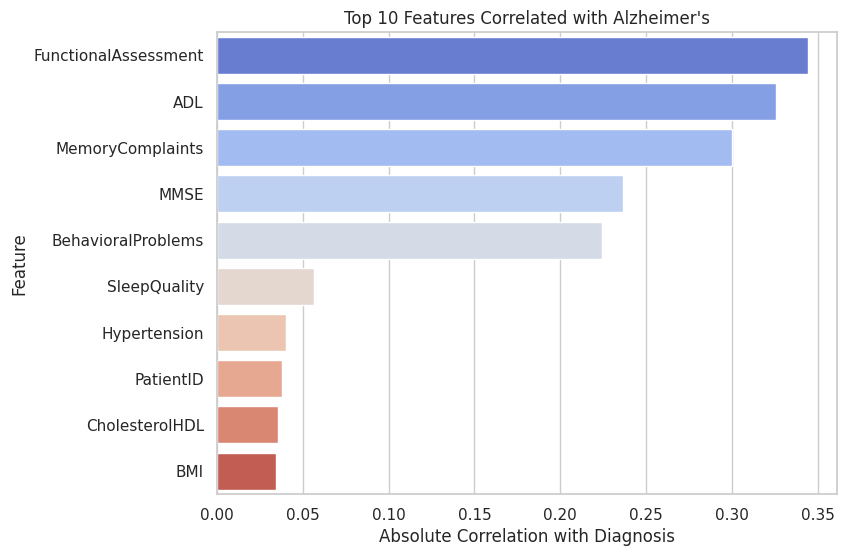

In [12]:
# Compute correlation matrix for numeric features
corr = df.select_dtypes(include=['float64', 'int64']).corr()
target_corr = corr["Diagnosis"].drop("Diagnosis").abs().sort_values(ascending=False)

top10 = target_corr.head(10)
print("\n=== Top 10 Features Correlated with Alzheimer's Diagnosis ===")
display(top10)

# Bar plot
plt.figure(figsize=(8,6))
sns.barplot(x=top10.values, y=top10.index, palette="coolwarm")
plt.title("Top 10 Features Correlated with Alzheimer's")
plt.xlabel("Absolute Correlation with Diagnosis")
plt.ylabel("Feature")
plt.show()

# Select features for PCA/t-SNE
top_features = ["FunctionalAssessment", "ADL", "MemoryComplaints", "MMSE", "BehavioralProblems"]
X = df[top_features].fillna(df[top_features].mean())
y = df["Diagnosis"]



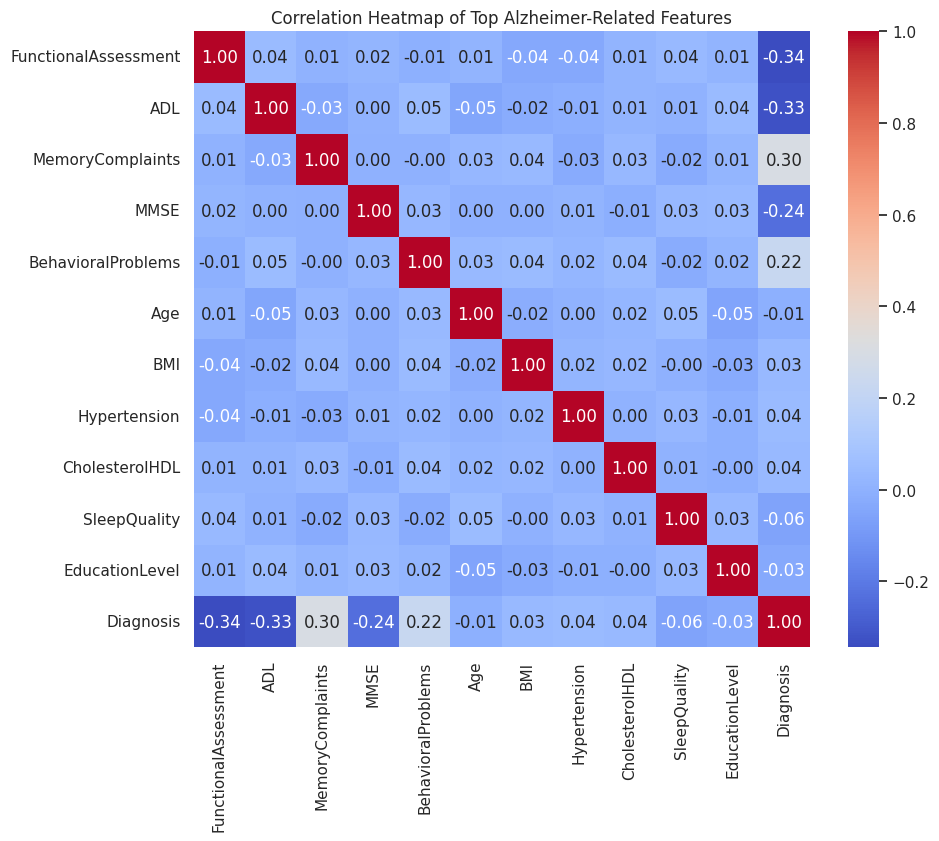

In [13]:
# Feature Correlation Heatmap
heatmap_features = top_features + ["Age", "BMI", "Hypertension", "CholesterolHDL", "SleepQuality", "EducationLevel"]
corr_heatmap = df[heatmap_features + ["Diagnosis"]].corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr_heatmap, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Heatmap of Top Alzheimer-Related Features")
plt.show()

The top 5 features used for PCA and t-SNE were selected based on the highest absolute correlation with the Diagnosis variable.

##Standardize features

In [14]:

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


## Principal Component Analysis (PCA)

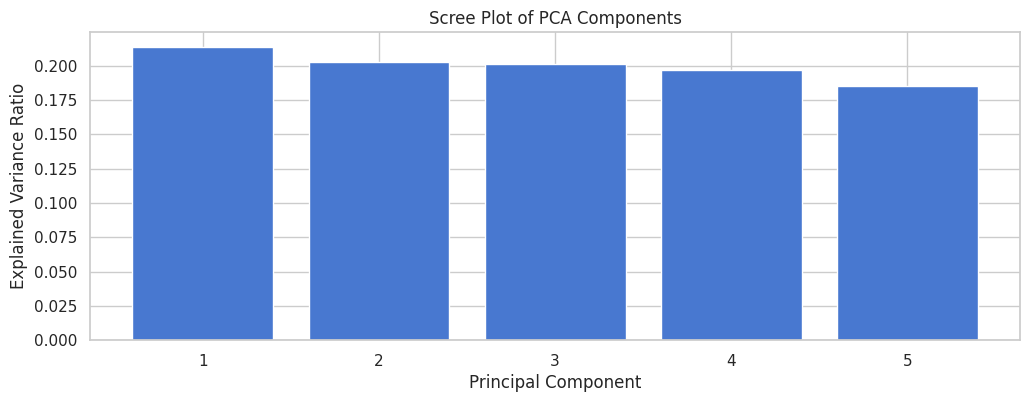

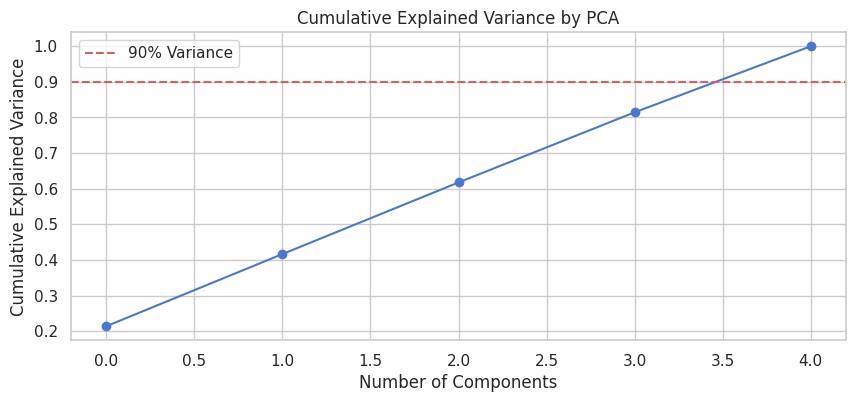

In [15]:
# PCA for explained variance (all components)
pca_full = PCA().fit(X_scaled)

plt.figure(figsize=(12,4))
plt.bar(range(1, len(pca_full.explained_variance_ratio_)+1), pca_full.explained_variance_ratio_)
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance Ratio")
plt.title("Scree Plot of PCA Components")
plt.show()

# Cumulative explained variance
plt.figure(figsize=(10,4))
plt.plot(np.cumsum(pca_full.explained_variance_ratio_), marker='o')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Cumulative Explained Variance by PCA")
plt.axhline(0.9, color='r', linestyle='--', label="90% Variance")
plt.legend()
plt.show()



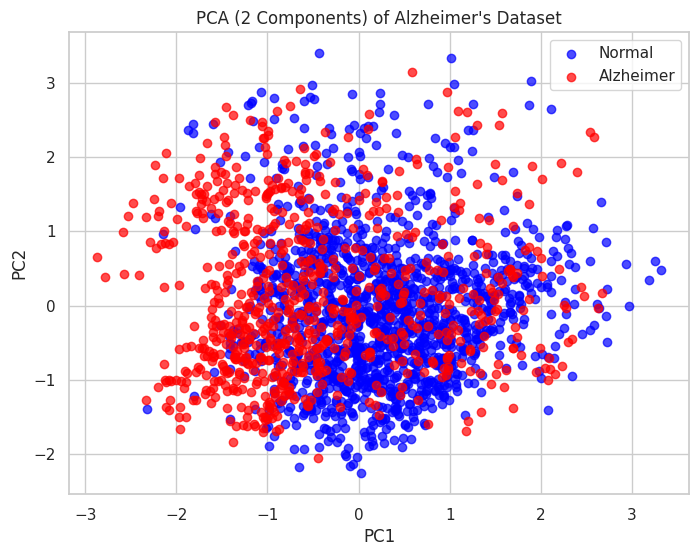

In [16]:
# PCA for visualization (2 components)
pca_2 = PCA(n_components=2, random_state=42)
X_pca2 = pca_2.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
for label, color, name in [(0, "blue", "Normal"), (1, "red", "Alzheimer")]:
    idx = y == label
    plt.scatter(X_pca2[idx,0], X_pca2[idx,1], c=color, alpha=0.7, label=name)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA (2 Components) of Alzheimer's Dataset")
plt.legend()
plt.show()


The PCA results indicate that although the first few principal components captured most of the variance in the dataset, the patient groups Alzheimer and Non-Alzheimer groups showed overlap. This suggests that the patterns associated with Alzheimer’s disease are subtle and cannot be fully separated through linear dimensionality reduction alone.

##t-Distributed Stochastic Neighbor Embedding (t-SNE)



In [17]:
pca_tsne = PCA(n_components=5, random_state=42)
X_pca_tsne = pca_tsne.fit_transform(X_scaled)

# t-SNE
tsne = TSNE(
    n_components=2,
    perplexity=30,
    n_iter=2000,
    learning_rate='auto',
    init='pca',
    random_state=42
)
X_tsne = tsne.fit_transform(X_pca_tsne)


/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


- Perplexity = 30 was chosen to balance local vs global structure.
- PCA initialization stabilizes the embedding.
2000 iterations ensure convergence.

## t-SNE of Alzheimer's Dataset (Top Features)

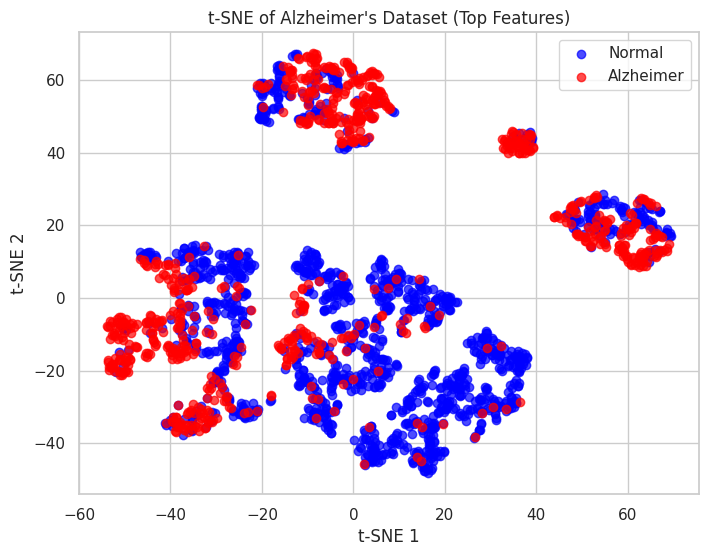

In [18]:
plt.figure(figsize=(8,6))
for label, color, name in [(0, "blue", "Normal"), (1, "red", "Alzheimer")]:
    idx = y == label
    plt.scatter(X_tsne[idx,0], X_tsne[idx,1], c=color, alpha=0.7, label=name)
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.title("t-SNE of Alzheimer's Dataset (Top Features)")
plt.legend()
plt.show()

The t-SNE embedding using the top-ranked features reveals clearer structure and stronger class separation compared to using all features. Alzheimer’s cases (red) tend to cluster more tightly in several regions of the manifold, while normal individuals (blue) occupy different subspaces with less overlap.

This pattern suggests that the selected top features encode high-value diagnostic information, capturing nonlinear relationships that distinguish Alzheimer’s from normal aging. The emergence of compact Alzheimer-specific clusters indicates strong local homogeneity and confirms that these features are particularly effective for downstream classification tasks.

## t-SNE Visualization: Age Pattern in Normal vs Alzheimer’s

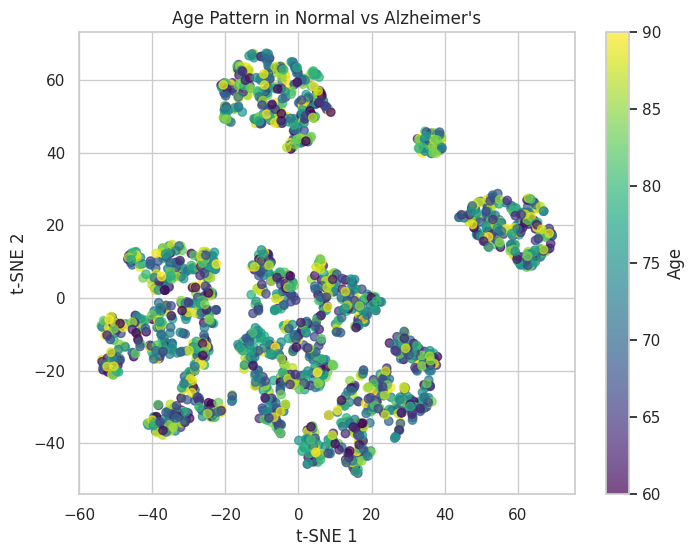

In [19]:
plt.figure(figsize=(8,6))
plt.scatter(X_tsne[:,0], X_tsne[:,1], c=df["Age"], cmap="viridis", alpha=0.7)
plt.colorbar(label="Age")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.title("Age Pattern in Normal vs Alzheimer's")
plt.show()



This visualization explores how age distributes across the t-SNE clusters. Although individuals of different ages appear throughout all clusters, there is no strong age-driven separation between Alzheimer’s and non-Alzheimer’s groups. The age colors are scattered uniformly, suggesting that age alone is not the primary factor driving cluster formation in the low-dimensional embedding. This aligns with clinical expectations, as Alzheimer’s risk increases with age but does not form distinct age-based subgroups in isolation.

##t-SNE Visualization: MMSE Pattern in Normal vs Alzheimer’s

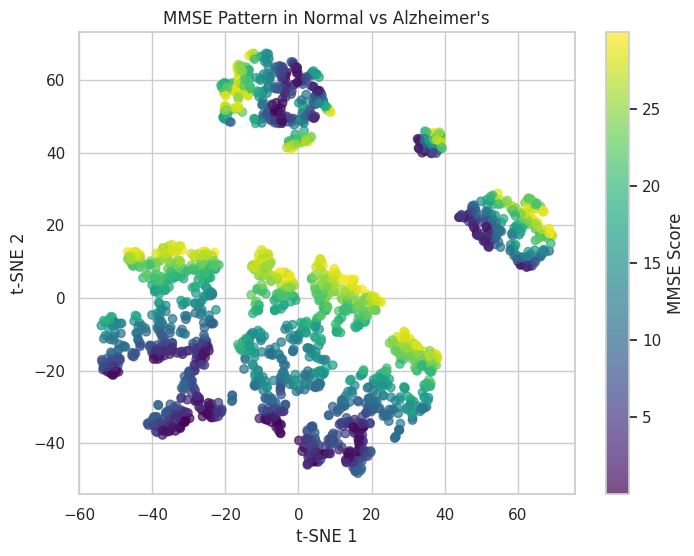

In [20]:

plt.figure(figsize=(8,6))
plt.scatter(X_tsne[:,0], X_tsne[:,1], c=df["MMSE"], cmap="viridis", alpha=0.7)
plt.colorbar(label="MMSE Score")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.title("MMSE Pattern in Normal vs Alzheimer's")
plt.show()

The MMSE-based visualization shows clearer structure than age. Clusters contain gradual gradients from higher MMSE scores (cognitively healthy) to lower scores (cognitive impairment). Regions associated with Alzheimer’s patients tend to contain lower MMSE values, while normal participants cluster more strongly in the high-MMSE areas. This indicates that MMSE is a major contributor to how t-SNE organizes the data, making it a key variable influencing cognitive status separation.

## t-SNE Visualization Colored by MemoryComplaints

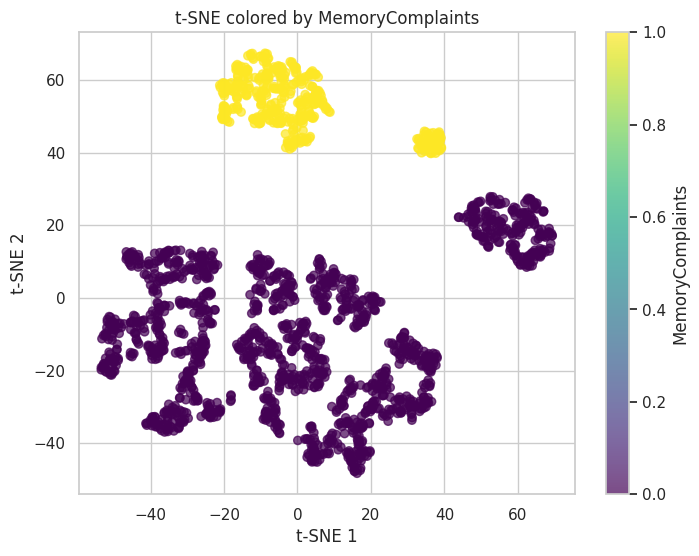

In [21]:
plt.figure(figsize=(8,6))
plt.scatter(X_tsne[:,0], X_tsne[:,1], c=df["MemoryComplaints"], cmap="viridis", alpha=0.7)
plt.colorbar(label="MemoryComplaints")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.title("t-SNE colored by MemoryComplaints")
plt.show()


Memory complaints show one of the most distinct patterns in the dataset. Individuals who report memory complaints (value = 1) form well-defined and compact clusters, which strongly overlap with Alzheimer’s cases. Meanwhile, individuals without complaints are widely dispersed across the embedding. This suggests that memory complaints play a powerful role in differentiating between healthy aging and potential Alzheimer’s-related decline, making it a highly discriminative feature.


## t-SNE Visualization Colored by Behavioral Problems

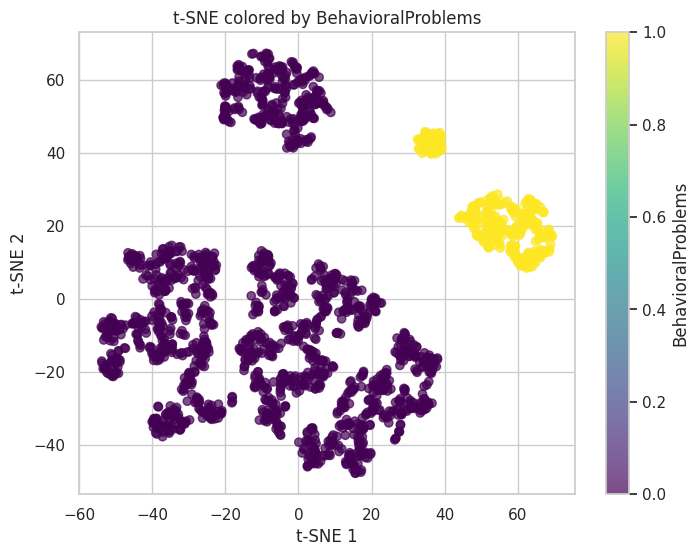

In [22]:
plt.figure(figsize=(8,6))
plt.scatter(X_tsne[:,0], X_tsne[:,1], c=df["BehavioralProblems"], cmap="viridis", alpha=0.7)
plt.colorbar(label="BehavioralProblems")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.title("t-SNE colored by BehavioralProblems")
plt.show()


Behavioral Problems exhibit one of the clearest separation patterns in the dataset.
Individuals with behavioral problems (value = 1) form tight, homogeneous clusters within the t-SNE embedding, indicating strong intra-group similarity and a high degree of feature coherence. In contrast, those without behavioral issues are widely scattered across the latent space.
This distinct separation suggests that behavioral problems are a highly discriminative and information-rich feature, strongly contributing to the latent structure of the data and helping differentiate between typical aging patterns and Alzheimer’s-related behavioral decline.

## Comparison: PCA vs t-SNE

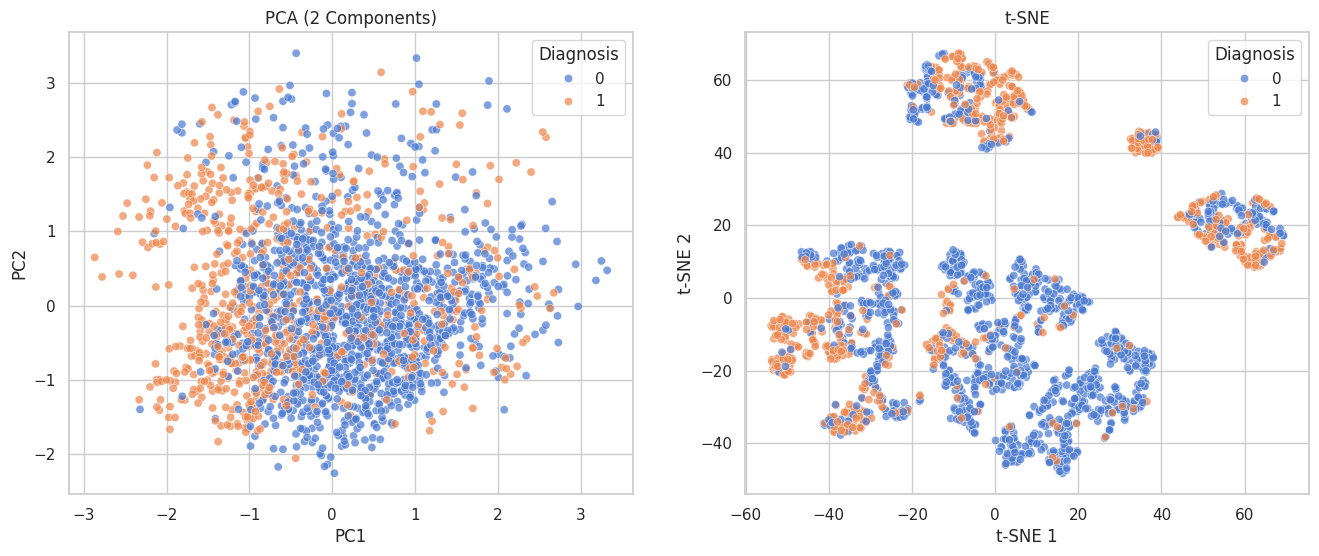

In [23]:
# Comparison: PCA vs t-SNE
fig, axes = plt.subplots(1, 2, figsize=(16,6))

# PCA
sns.scatterplot(x=X_pca2[:,0], y=X_pca2[:,1], hue=y, alpha=0.7, ax=axes[0])
axes[0].set_title("PCA (2 Components)")
axes[0].set_xlabel("PC1")
axes[0].set_ylabel("PC2")

# t-SNE
sns.scatterplot(x=X_tsne[:,0], y=X_tsne[:,1], hue=y, alpha=0.7, ax=axes[1])
axes[1].set_title("t-SNE")
axes[1].set_xlabel("t-SNE 1")
axes[1].set_ylabel("t-SNE 2")

plt.show()



**PCA (Linear Subspace Projection)**
PCA captures the dominant sources of variance, but does not produce a clear separation between Alzheimer’s and non-Alzheimer groups, indicating that the disease-related patterns are nonlinear and not fully explained through linear projection. Because PCA preserves only global linear variance, the projection suggests that no strong linear boundary exists in the raw feature space. This indicates that the diagnostic signal is not dominated by simple additive relationships but instead arises from more complex interactions.

**t-SNE (Nonlinear Manifold Embedding)**
t-SNE uncovers multiple compact and coherent clusters, with Alzheimer’s cases increasingly concentrated within specific regions of the embedding. This pattern reflects underlying nonlinear manifold structures in the data—structures that PCA cannot reveal. The clearer separation in t-SNE suggests that local neighborhood relationships encode meaningful diagnostic information.


These embeddings show that Alzheimer’s classification relies on nonlinear, high-dimensional feature interactions rather than linear variance. This implies that nonlinear models such as tree-based ensembles or neural architectures are more suitable for capturing disease related patterns than linear methods alone.

# Conclusion
PCA results indicate that Alzheimer’s and non-Alzheimer individuals do not form distinct linearly separable groups, implying that the underlying disease-related patterns are subtle and nonlinear in nature. In contrast, t-SNE reveals clearer local structures in the data and highlights the influence of cognitive and behavioral features in shaping patient clusters.

These findings suggest that Alzheimer’s progression is better captured through nonlinear representations, and that models incorporating higher-order feature interactions or nonlinear decision boundaries may yield improved predictive performance. The dimensionality reduction analysis successfully evaluates whether functional and cognitive variables can naturally separate affected individuals from healthy controls. While PCA does not provide meaningful discrimination between groups, t-SNE uncovers nonlinear structure and partially achieves this objective, supporting its value as an exploratory diagnostic visualization technique.

# Recommendations
- Explore UMAP as an additional nonlinear dimensionality reduction technique for more stable manifold unfolding.
- Prioritize cognitive–behavioral variables in future predictive models.
- Apply feature engineering that captures interactions between cognitive metrics and behavioral symptoms.
- Combine dimensionality reduction outcomes with clustering algorithms (e.g., DBSCAN) to uncover latent patient subgroup structures.

## Business Impact and Practical Applications

- These insights support the development of smarter healthcare tools.  
- Hospitals, clinics, and digital health companies can apply nonlinear analytics to improve decision-making.  
- Such analytics can be used to build early-screening systems for detecting Alzheimer’s risk sooner.  
- They can also power risk-monitoring dashboards that track patient health trends over time.  
- Machine-learning–driven analysis enables more accurate and personalized decision-support tools.  
- Overall, this demonstrates how data-driven methods can translate into practical healthcare solutions that enhance early detection and improve care management.
